In [138]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dateTime
from scipy.stats import linregress
import json

from api_keys import polyID

In [244]:
dateRange = "2021-11-08/2023-11-01"
urlSony = "https://api.polygon.io/v2/aggs/ticker/SONY/range/1/day/"+ dateRange +"?apiKey=" + polyID

sony_data = []
dateUse = 0

sony_get = requests.get(urlSony).json()

#print(json.dumps(sony_get, indent=4,sort_keys=True))
for date in sony_get["results"]:
    date = dateUse
    sony_close = sony_get["results"][date]["c"]
    sony_high = sony_get["results"][date]["h"]
    sony_low = sony_get["results"][date]["l"]
    sony_date = time.ctime(sony_get["results"][date]["t"] / 1000)

    sony_data.append({
        "Date": sony_date,
        "Close": sony_close,
        "High": sony_high,
        "Low": sony_low})
    dateUse = dateUse + 1
    

#86,400,000

In [278]:
sony_dataDF = pd.DataFrame(sony_data)
sony_dataDF.to_csv("output-data\sonyStocks", index_label= "Day")
sony_dataDF

,Date,Close,High,Low
0,Mon Nov 8 00:00:00 2021,123.35,124.63,123.3400
1,Tue Nov 9 00:00:00 2021,122.47,123.77,121.7200
2,Wed Nov 10 00:00:00 2021,121.45,122.86,121.2200
3,Thu Nov 11 00:00:00 2021,121.00,122.09,120.8200
4,Fri Nov 12 00:00:00 2021,122.90,123.19,121.8900
...,...,...,...,...
494,Thu Oct 26 00:00:00 2023,80.97,81.82,80.5500
495,Fri Oct 27 00:00:00 2023,80.04,80.95,79.6200
496,Mon Oct 30 00:00:00 2023,81.74,82.05,80.9300
497,Tue Oct 31 00:00:00 2023,83.05,83.27,82.5515


In [368]:
sony_dataDF = pd.read_csv("output-data\sonyStocks", index_col="Day")
sony_dataDF

,Date,Close,High,Low
Day,,,,
0,Mon Nov 8 00:00:00 2021,123.35,124.63,123.3400
1,Tue Nov 9 00:00:00 2021,122.47,123.77,121.7200
2,Wed Nov 10 00:00:00 2021,121.45,122.86,121.2200
3,Thu Nov 11 00:00:00 2021,121.00,122.09,120.8200
4,Fri Nov 12 00:00:00 2021,122.90,123.19,121.8900
...,...,...,...,...
494,Thu Oct 26 00:00:00 2023,80.97,81.82,80.5500
495,Fri Oct 27 00:00:00 2023,80.04,80.95,79.6200
496,Mon Oct 30 00:00:00 2023,81.74,82.05,80.9300


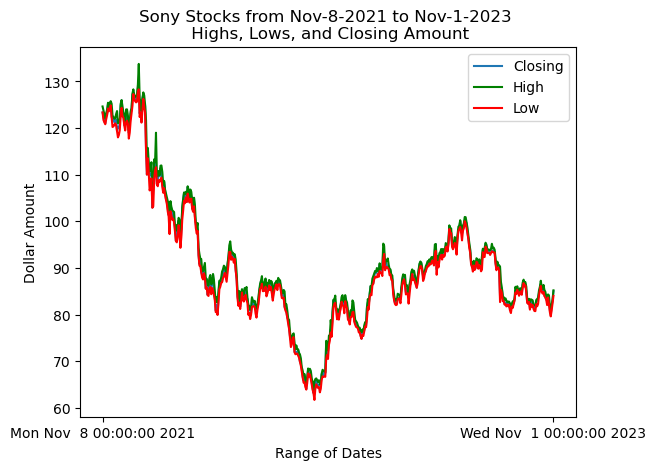

In [266]:
close = sony_dataDF["Close"]
high = sony_dataDF["High"]
low = sony_dataDF["Low"]
date = sony_dataDF["Date"]

closeDate = plt.plot(date, close, label="Closing")
highDate = plt.plot(date,high, color= "green", label="High")
lowDate = plt.plot(date, low, color="red", label= "Low")

plt.title(f"Sony Stocks from Nov-8-2021 to Nov-1-2023 \n Highs, Lows, and Closing Amount")
plt.xlabel("Range of Dates")
plt.ylabel("Dollar Amount")
plt.xticks([0,498])
plt.legend(loc="best")
plt.savefig("output-data/Fig1.png")
plt.show()

In [248]:
closeMean = close.mean().round(2)
highMean = high.mean().round(2)
lowMean = low.mean().round(2)

closeMed = close.median()
highMed = high.median()
lowMed = low.median()

closeVar = close.var()
highVar = high.var()
lowVar = low.var()

closeStd = close.std()
highStd = high.std()
lowStd = low.std()

print("*" * 20)
print(f"Closing Data: \n Mean: ${closeMean} \n Median: ${closeMed} \n Variance: ${closeVar} \n Standard Deviation: ${closeStd}")
print("*" * 20)
print(f"Highs Data: \n Mean: ${highMean} \n Median: ${highMed} \n Variance: ${highVar} \n Standard Deviation: ${highStd}")
print("*" * 20)
print(f"Lows Data: \n Mean: ${lowMean} \n Median: ${lowMed} \n Variance: ${lowVar} \n Standard Deviation: ${lowStd}")
print("*" * 20)

with open("output-data\SonyStocksCalculation.txt", "w") as f:
    f.write("*" * 20)
    f.write("\n")
    f.write(f"Closing Data: \n Mean: ${closeMean} \n Median: ${closeMed} \n Variance: ${closeVar} \n Standard Deviation: ${closeStd} \n")
    f.write("*" * 20)
    f.write("\n")
    f.write(f"Highs Data: \n Mean: ${highMean} \n Median: ${highMed} \n Variance: ${highVar} \n Standard Deviation: ${highStd} \n")
    f.write("*" * 20)
    f.write("\n")
    f.write(f"Lows Data: \n Mean: ${lowMean} \n Median: ${lowMed} \n Variance: ${lowVar} \n Standard Deviation: ${lowStd} \n")
    f.write("*" * 20)

********************
Closing Data: 
 Mean: $90.85 
 Median: $87.54 
 Variance: $204.58699524269431 
 Standard Deviation: $14.30339103998399
********************
Highs Data: 
 Mean: $91.66 
 Median: $88.43 
 Variance: $208.78145933333778 
 Standard Deviation: $14.449271930908415
********************
Lows Data: 
 Mean: $90.11 
 Median: $86.8149 
 Variance: $201.65692695308493 
 Standard Deviation: $14.200596006966924
********************


In [371]:
sonyAcquireDF = pd.read_csv("output-data/SonyGetcsv.csv")
del sonyAcquireDF["Value"]
del sonyAcquireDF["Country"]
del sonyAcquireDF["Used as / Integrated with"]
del sonyAcquireDF["References"]
del sonyAcquireDF["Business"]

sonyAcquireDF["Date"] = pd.to_datetime(sonyAcquireDF["Date"], format= "%d %B %Y")
sonyAcquireDF["Date"] = sonyAcquireDF["Date"].dt.strftime("%c")
sonyAcquireDF.drop(sonyAcquireDF.index[0:98],inplace=True)
#sonyAcquireDF = sonyAcquireDF.set_index("Date")
sonyMergedDF = pd.merge(sony_dataDF, sonyAcquireDF, how= "left")
sonyMergedDF = sonyMergedDF.dropna(subset=["Company"])
sonyMergedDF.to_csv("output-data\sonyStocks2", index_label= "Day")
sonyMergedDF

,Date,Close,High,Low,Company
16,Wed Dec 1 00:00:00 2021,119.37,123.650,119.270,Bad Wolf
23,Fri Dec 10 00:00:00 2021,123.26,123.350,122.220,Valkyrie Entertainment
50,Thu Jan 20 00:00:00 2022,113.63,115.740,113.500,Ultra Records
58,Tue Feb 1 00:00:00 2022,112.56,112.660,110.950,Lasengle
79,Thu Mar 3 00:00:00 2022,100.23,102.010,99.770,Industrial Media
91,Mon Mar 21 00:00:00 2022,104.45,105.970,103.880,Haven Studios
171,Fri Jul 15 00:00:00 2022,82.15,82.210,80.960,Bungie
172,Mon Jul 18 00:00:00 2022,82.21,83.500,82.050,Repeat.gg
185,Thu Aug 4 00:00:00 2022,85.95,86.620,85.270,Right Stuf
202,Mon Aug 29 00:00:00 2022,81.34,81.950,80.880,Savage Game Studios


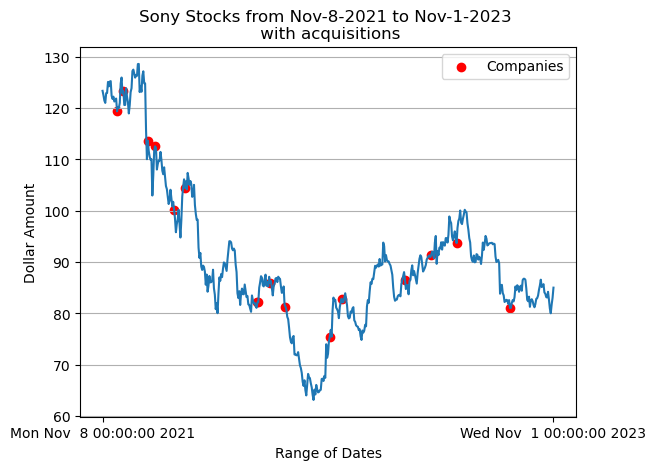

In [387]:
close = sony_dataDF["Close"]
mergeClose = sonyMergedDF["Close"]
date = sony_dataDF["Date"]
dateAcq = sonyMergedDF["Date"]
comp = sonyMergedDF["Company"]

line1 = plt.plot(date, close)
scatter1 = plt.scatter(dateAcq,mergeClose, marker="o", color="red", label="Companies")

plt.title(f"Sony Stocks from Nov-8-2021 to Nov-1-2023 \n with acquisitions")
plt.xlabel("Range of Dates")
plt.ylabel("Dollar Amount")
plt.xticks([0,498])
plt.grid(axis="y")
plt.legend()
plt.savefig("output-data/Fig2.png")
plt.show()

In [380]:
dateRange = "2021-11-08/2023-11-01"
urlMicro = "https://api.polygon.io/v2/aggs/ticker/MSFT/range/1/day/"+ dateRange +"?apiKey=" + polyID

micro_data = []
dateUse = 0

micro_get = requests.get(urlMicro).json()

#print(json.dumps(sony_get, indent=4,sort_keys=True))
for date in micro_get["results"]:
    date = dateUse
    micro_close = micro_get["results"][date]["c"]
    micro_high = micro_get["results"][date]["h"]
    micro_low = micro_get["results"][date]["l"]
    micro_date = time.ctime(micro_get["results"][date]["t"] / 1000)

    micro_data.append({
        "Date": micro_date,
        "Close": micro_close,
        "High": micro_high,
        "Low": micro_low})
    dateUse = dateUse + 1
    


In [381]:
micro_dataDF = pd.DataFrame(micro_data)
micro_dataDF.to_csv("output-data\microStocks", index_label= "Day")
micro_dataDF

,Date,Close,High,Low
0,Mon Nov 8 00:00:00 2021,336.99,337.6500,334.4400
1,Tue Nov 9 00:00:00 2021,335.95,338.7200,334.5300
2,Wed Nov 10 00:00:00 2021,330.80,334.6303,329.9200
3,Thu Nov 11 00:00:00 2021,332.43,333.7746,330.5100
4,Fri Nov 12 00:00:00 2021,336.72,337.2300,333.7900
...,...,...,...,...
494,Thu Oct 26 00:00:00 2023,327.89,341.6300,326.9400
495,Fri Oct 27 00:00:00 2023,329.81,336.7200,328.4007
496,Mon Oct 30 00:00:00 2023,337.31,339.4500,330.5200
497,Tue Oct 31 00:00:00 2023,338.11,339.0000,334.6900


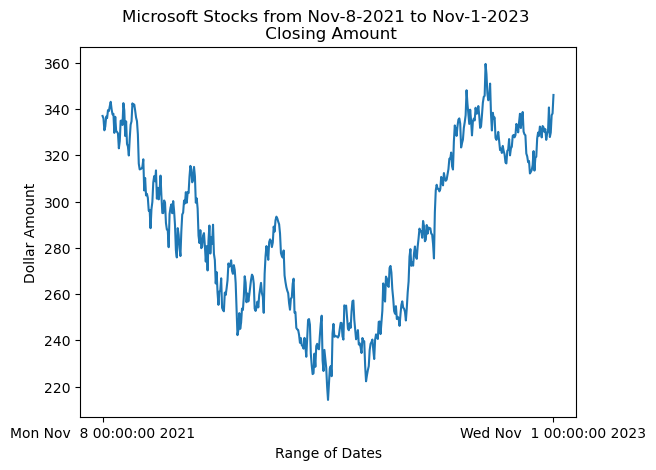

In [383]:
close = micro_dataDF["Close"]
date = micro_dataDF["Date"]

closeDate = plt.plot(date, close, label="Closing")

plt.title(f"Microsoft Stocks from Nov-8-2021 to Nov-1-2023 \n Closing Amount")
plt.xlabel("Range of Dates")
plt.ylabel("Dollar Amount")
plt.xticks([0,498])
plt.savefig("output-data/Fig3.png")
plt.show()

In [384]:
closeMean = close.mean().round(2)
highMean = high.mean().round(2)
lowMean = low.mean().round(2)

closeMed = close.median()
highMed = high.median()
lowMed = low.median()

closeVar = close.var()
highVar = high.var()
lowVar = low.var()

closeStd = close.std()
highStd = high.std()
lowStd = low.std()

print("*" * 20)
print(f"Closing Data: \n Mean: ${closeMean} \n Median: ${closeMed} \n Variance: ${closeVar} \n Standard Deviation: ${closeStd}")
print("*" * 20)
print(f"Highs Data: \n Mean: ${highMean} \n Median: ${highMed} \n Variance: ${highVar} \n Standard Deviation: ${highStd}")
print("*" * 20)
print(f"Lows Data: \n Mean: ${lowMean} \n Median: ${lowMed} \n Variance: ${lowVar} \n Standard Deviation: ${lowStd}")
print("*" * 20)

with open("output-data\MicrosoftStocksCalculation.txt", "w") as f:
    f.write("*" * 20)
    f.write("\n")
    f.write(f"Closing Data: \n Mean: ${closeMean} \n Median: ${closeMed} \n Variance: ${closeVar} \n Standard Deviation: ${closeStd} \n")
    f.write("*" * 20)
    f.write("\n")
    f.write(f"Highs Data: \n Mean: ${highMean} \n Median: ${highMed} \n Variance: ${highVar} \n Standard Deviation: ${highStd} \n")
    f.write("*" * 20)
    f.write("\n")
    f.write(f"Lows Data: \n Mean: ${lowMean} \n Median: ${lowMed} \n Variance: ${lowVar} \n Standard Deviation: ${lowStd} \n")
    f.write("*" * 20)

********************
Closing Data: 
 Mean: $288.28 
 Median: $287.15 
 Variance: $1303.3240073747895 
 Standard Deviation: $36.101579014979244
********************
Highs Data: 
 Mean: $91.66 
 Median: $88.43 
 Variance: $208.78145933333778 
 Standard Deviation: $14.449271930908415
********************
Lows Data: 
 Mean: $90.11 
 Median: $86.8149 
 Variance: $201.65692695308493 
 Standard Deviation: $14.200596006966924
********************


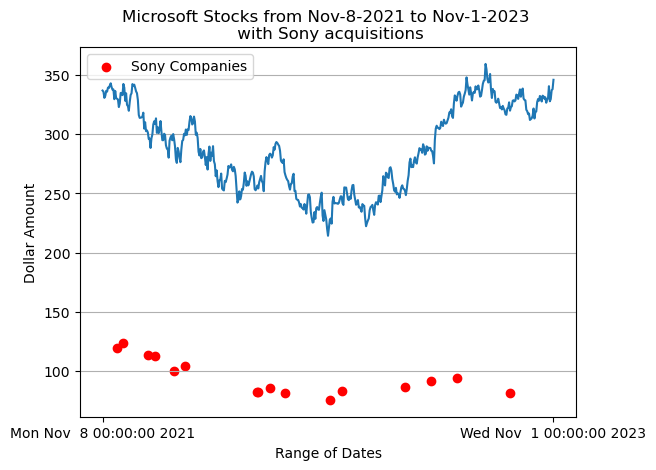

In [388]:
close = micro_dataDF["Close"]
mergeClose = sonyMergedDF["Close"]
date = micro_dataDF["Date"]
dateAcq = sonyMergedDF["Date"]
comp = sonyMergedDF["Company"]

line1 = plt.plot(date, close)
scatter1 = plt.scatter(dateAcq,mergeClose, marker="o", color="red", label="Sony Companies")

plt.title(f"Microsoft Stocks from Nov-8-2021 to Nov-1-2023 \n with Sony acquisitions")
plt.xlabel("Range of Dates")
plt.ylabel("Dollar Amount")
plt.xticks([0,498])
plt.grid(axis="y")
plt.legend(loc="best")
plt.savefig("output-data/Fig4.png")
plt.show()